In [6]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [24]:
from IPython.display import HTML
style = "<style>svg{width:30% !important;height:30% !important;}</style>"
HTML(style)

In [9]:
titanic_data = pd.read_csv('train.csv')

In [10]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Описание датафрейма:

* PassengerId - id пассажира
* Survived - выжил пассажир или нет
* Pclass - класс биллета, который он приобрёл
* Name - имя
* Sex - пол
* Age - возраст
* SibSp - число сопутствующих с ним пассажиров
* Parch - число родителей/детей на борту Титаника
* Ticket - номер билета
* Fare -
* Cabin - каюта, в которой он ехал
* Embarked - Порт погрузки(C = Шербур, Q = Куинстаун, S = Саутгемптон)

Задача: обучить дерево решений, которое будет предсказывать выжил пассажир или не выжил, основываясь на данных пассажиров из датасета train.csv.

При работе с данными первым делом есть смысл сделать базовую предобработку. Чтобы понять с какими данными в принципе мы работаем.

Как минимум применить метод head() чтобы понять какого типа данные есть в датасете, визуально их рассмотреть. А ещё полезно посмотреть сколько пропущенных значений в колонках. Потому что если есть какие-то переменные, в которых 99% пропущенных значений, то скорее всего от них можно отказаться.

Как проверить в pandas наличие пропущенных значений в нашем датафрейме?

Во-первых, в pandas у датафрейма есть метод isnul(), возвращающий False или True для каждого наблюдения, в зависимости от того является ли наблюдение пропущенным.

In [11]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Поэтому давайте сейчас отберём только самые очевидные переменные, которые мы будем использовать для обучения и на них обучимся.

Итак, мы выкидаем из наблюдения следующие колонки:

* Идентификатор пассажира
* Номер билета
* Номер каюты
* Имя пассажира
* Survived

Поскольку имя пассажира - это очень уникальная особенность конкретно взятого пассажираи использовать имя для вычисления некоторых закономерностей выглядит неразумно.

Survived удаляем не потому, что с ней что-то не так, а потому, что именно её мы и хотим предсказывать.

In [12]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [13]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [20]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [21]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

Мы поймали ошибку, связанную с преобразованием данных.

Оказывается в sklearn реализации дерева решений этот алгоритм может работать только с числовыми данными и даже номинативные переменные мы должны закодировать в виде числовых переменных при помощи 0, 1 или других чисел. А вот со строковыми идентификаторами работать, к сожалению, не получится.

Значит продолжаем процесс предобработки данных и избавляемся от переменных, записанных в строковом виде. Это интересная тема и существует несколько способов как это можно сделать.

Например, переменная Survived тоже является номинативной переменной, которая могла быть записана строками, а она записана 0 и 1.

Вот такой способ кодировки номинативных переменных в количественные называется label encoding - когда мы присваиваем некоторму уровню просто некоторую градацию. Например male будет 0, а female будет 1.

Это абсолютно допустимый вариант, особенно, когда мы работаем с деревьями решений. Потому что мы теперь будем говорить if Sex > 0.5 значит мы работаем в ситуации когда у нас один пол, а в другой ситуации - другой пол.

Либо есть другой способ one hot encoding когда мы переменную Sex разбиваем на две переменные - у нас будет переменная Sex male и Sex female. Они будут принимать значения либо 0, либо 1 в завиомости от того, что мы получаем.

Я подробнее расскажу о том какой способ предпочтительнее и есть ли предпочтительный способ для работы с деревом решений (забегая вперёд - нет, можно использовать оба).

Поэтому давайте сейчас воспользуемся вторым способом.

Можно добиться этого разными способами:

* есть специальные методы в sklearn
* в pandas есть метод get_dummies(), получающий на вход датафрейм и понимающий сам какие переменные нужно преобразовать в dummy variables, потому что если переменная записана в числовом виде, то он и не будет её трогать, а если переменная была записана в строковом виде - то переменная разобьётся на несколько

In [16]:
X = pd.get_dummies(X)

In [17]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [18]:
X = X.fillna({'Age': X.Age.median()})

In [19]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [22]:
import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files (x86)\\Graphviz2.38\\bin" + os.pathsep + "C:\\Program Files (x86)\\Graphviz2.38"

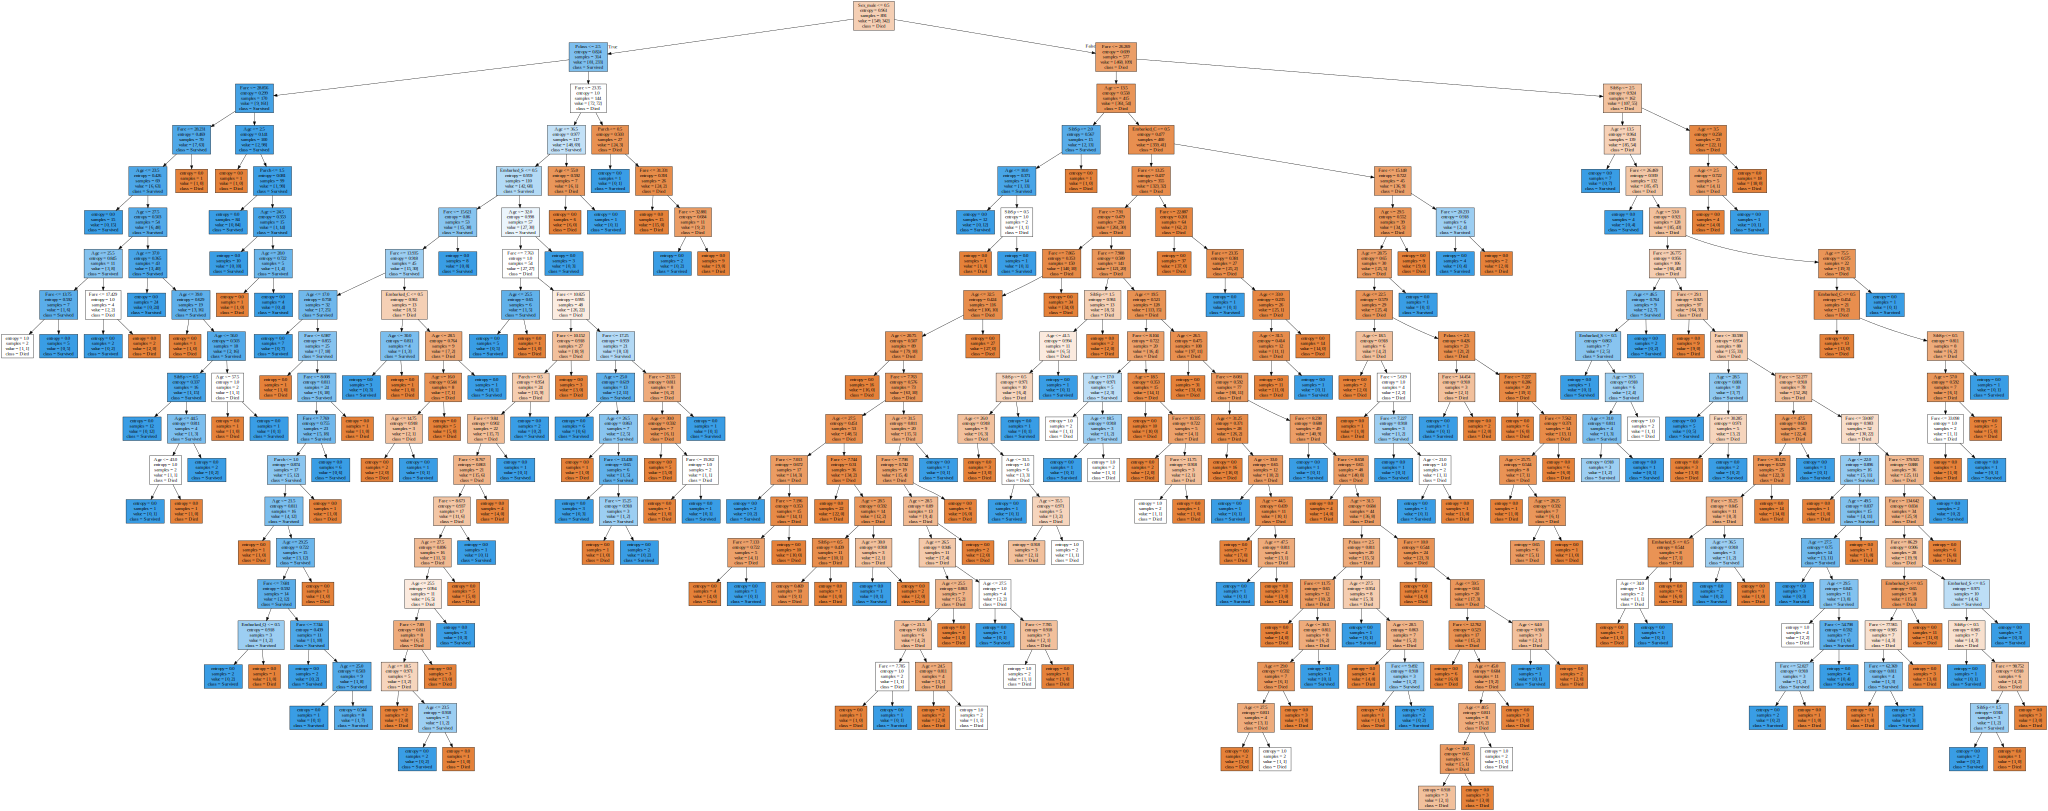

In [25]:
import sklearn
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=['Died', 'Survived'], filled=True))


display(SVG(graph.pipe(format='svg')))


Что это такое?

Это вообще непохоже на сколько-нибудь вменяемую конструкцию классификации пассажиров Титаника на то выжили они или нет.

Может с X что-то случилось?

Так что же именно пошло не так? Почему наше дерево решений так разрослось до огромных размеров?

И кажется, что те взаимосвязи которые оно выстроило - усложнены, и человек решил бы всё явно проще.

Что случилось?

Случилась интересная штука. Мы примерно разобрали как устроен математический аппарат дерева решений и какой алгоритм там используется. Дерево решений не ставит своей целью вычленить какой-то паттерн, какую-то общую закономерность, которую можно использовать как некоторое генерализированное правило.

Помните с самого начала курс мы говорили о том, что такое обучиться чему-то? Например, научить ребенка отличать кошек от собак. Мы показываем ему 15 кошек и 15 собак и задача ребенка не отличать конкретно этих 15 кошек и 15 собак, а вычислить закономерность из этих 30 примеров и затем отличать между собой любых кошек и собак.

А в дереве решений, которое мы описали, это никак не заложено. Всё что делает дерево решений это говорит - пока я могу ещё снизить энтропию я буду снижать энтропию и разделять кошек от собак, кошек от собак до тех пор, пока все кошки не будут классифицированы как кошки, а собака - как собаки. И это далеко не то же самое, что вычленить общую закономерность.

Подытожим всё вышесказанное. То что мы наблюдали называется переобучение или overfitting нашей модели.

Мы сказали нашей модели не вычлени закономерность в нашей модели, которая разделяет наших пассажиров на: выжил/не выжил, а мы сказали дереву вот тебе наш датафрейм, вот переменная y - сделай такое дерево решений, которое безошибочно классифицирует все наблюдения в нашем датафрейме.

Как только мы спускаемся всё ниже и ниже у нас возникают новые неопределённости.

Нам нужно проверить, что наша закономерность, проверенная на нашей выборке, хорошо работает и на новых данных.

То есть мы прогоняем дерево решений на новых данных и сравниваем предсказанные значения с их реальными значениями. Это позволит нам проверить правильно или нет работает наша модель.

Как добиться того, чтобы дерево решений решало другую задачу? Именно задачу вычленения общей закономерности.

Здесь нам на помощь приходит концепция подбора параметров.

У нашего дерева решений есть параметр, который мы можем безболезненно варьировать - глубина дерева. То есть мы можем ограничить количество вопросов, которое дерево может задать нашим данным.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
X_train.shape

(596, 10)

In [31]:
X_test.shape

(295, 10)

Итак, у нас есть 2 идеи:

* Науиться ограничивать дерево в его стремлении расти как можно глубже
* Нашему дереву показывать два абора данных:
    ** данные, на которых наше дерево обучится
    ** данные, на которых дерево протестируется
    
Для этого нам потребуется специальный метод train_test_split - удобная функция, получающая на вход датафрейм X с фичами, датафрейм y и разбивает их в заданной пропорции на тестовую и обучающую выборки.

tes_size = 0.33 значит:

* 33% данных уйдут в тестовую выборку
* остальное - в обучающую

Аналогично и с y.

Вернёмся к нашей задаче - убедимся, что у нас есть проблемы с тем деревом, которое мы получили. Потому что на самом деле тот факт, что наше дерево глубокое и большое вообще в каком-то смысле может и не сигнализировать о проблеме.

Может быть закономерность настолько сложная, что описать её деревом меньших масштабов никак не получится. Давайте это проверим.

Проверить это можно сравнив насколько хорошо наше дерево предсказывает правильные ответы на обучающей выборке(train множестве) и насколько хорошо - на тестовой. Это очень упрощённая версия валидации модели.

In [35]:
clf.score(X_train, y_train)

0.9798657718120806

В 97% случаев мы правильно классифицировали все наши наблюдения на обучающей выборке.

А что если мы возьмём наш классификатор и обучим его на обучающей выборке.

In [33]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [36]:
clf.score(X_test, y_test)

0.7762711864406779

Здесь нужно обратить внимание на большую разницу в полученных значениях на обучащей и тестовой выборках.

Большая разница в значениях говорит об overfitting

ограничим глубину дерева:

In [62]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [63]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [64]:
clf.score(X_train, y_train)

0.8238255033557047

In [65]:
clf.score(X_test, y_test)

0.8203389830508474

In [52]:
max_depth_values = range(1, 100)

In [53]:
scores_data = pd.DataFrame()

In [54]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [55]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


In [56]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'], var_name='set_type', value_name='score')

In [57]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


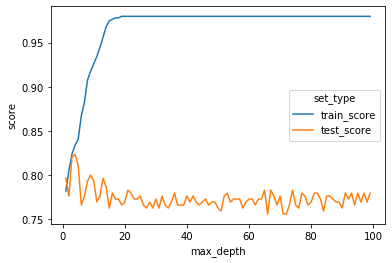

In [58]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

анализ графика:
* с увеличеним глубины дерева растет точность классификации на тренировочной выборке
* но это не всегда ведет к нахождению общих закономерностей исследуемых данных
* test score изначально невелик(модель ещ ене доучилась), на промежутке 3-5 score максимален(оптимальное состояние: закономерность с изученных данных переносится на новые), но в дальнейшем с увеличеним train score начинает падать test score(переход от недообученности к переобученности)

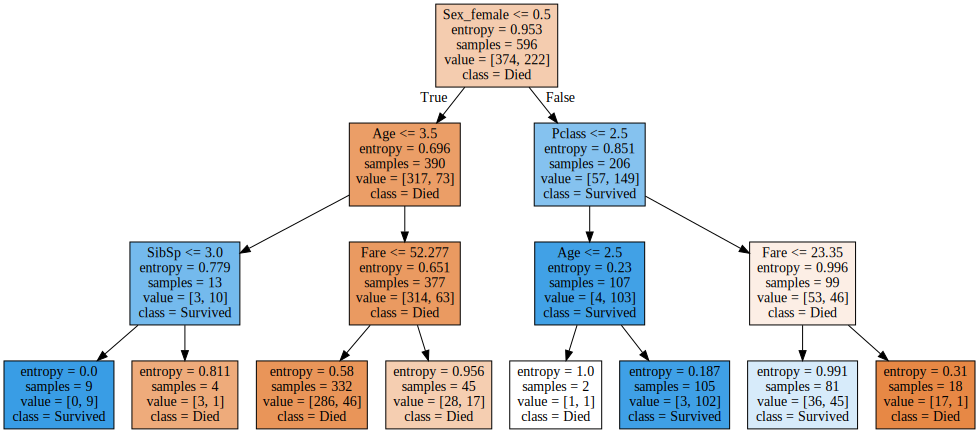

In [66]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=['Died', 'Survived'], filled=True))


display(SVG(graph.pipe(format='svg')))

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [69]:
cross_val_score(clf, X_train, y_train, cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [71]:
# средняя точность на кросс-валидации
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

In [72]:
scores_data = pd.DataFrame()

In [73]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [74]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.797031


In [75]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

In [76]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


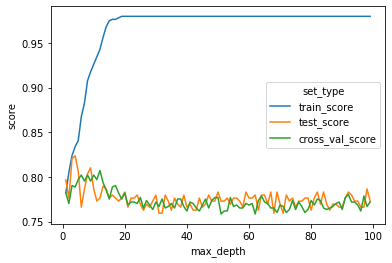

In [77]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

Можно заметить, что максимальная средняя точность на кросс-валидации достигается всё же при большей глубине дерева.

максимальная точность достигается при большей глубине дерева, чем 3-5

cross_val_score более устойчив к переобучению

найдем дерево с максимальным значением cross_val_score

In [78]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031
203,6,cross_val_score,0.802073
204,7,cross_val_score,0.795336
205,8,cross_val_score,0.802045
206,9,cross_val_score,0.795308
207,10,cross_val_score,0.802031


In [79]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [80]:
cross_val_score(best_clf, X_test, y_test , cv=5).mean()

0.7830508474576272

In [94]:
import numpy as np
np.random.seed(0)

In [95]:
train_iris = pd.read_csv('train_iris.csv', index_col=0)
test_iris = pd.read_csv('test_iris.csv', index_col=0)

In [96]:
X_train = train_iris.drop(['species'], axis=1)
X_test = test_iris.drop(['species'], axis=1)

In [97]:
y_train = train_iris.species
y_test = test_iris.species

In [98]:
rs = np.random.seed(0)
scores_data = pd.DataFrame()
max_depth_values = range(1, 100)

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
#     mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
#                                     'cross_val_score': [mean_cross_val_score]
                                   })
    scores_data = scores_data.append(temp_score_data)

In [101]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')

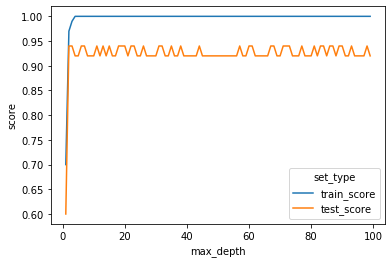

In [102]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)